# EDA PART


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

csv_path = Path.home() / "Documents" / "data1030-fall2025" / "data" / "midterm_pre.csv" 
df = pd.read_csv(csv_path)
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [61]:
print(df.shape)        
print(df.columns)
print(df.isna().sum())

(43824, 13)
Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')
No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64


Time series (line) — PM2.5 over time (daily or weekly aggregate)

Text(0, 0.5, 'pm2.5')

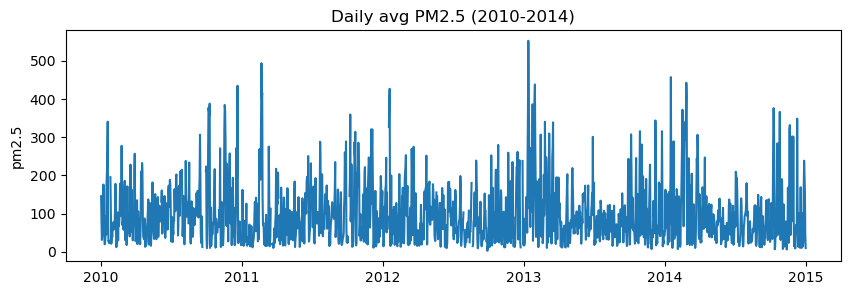

In [62]:
df['datetime'] = pd.to_datetime(df[['year','month','day','hour']])
ts = df.set_index('datetime')['pm2.5'].resample('D').mean()
plt.figure(figsize=(10,3))
plt.plot(ts)
plt.title('Daily avg PM2.5 (2010-2014)')
plt.ylabel('pm2.5')

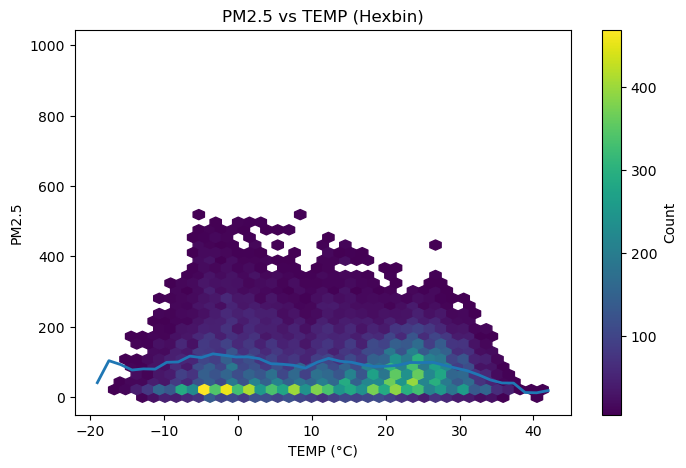

In [63]:
plt.figure(figsize=(8,5))
clean = df[['TEMP','pm2.5']].dropna()
hb = plt.hexbin(clean['TEMP'], clean['pm2.5'], gridsize=40, mincnt=5)
plt.colorbar(hb, label='Count')
plt.title('PM2.5 vs TEMP (Hexbin)')
plt.xlabel('TEMP (°C)'); plt.ylabel('PM2.5')
bins = np.linspace(clean['TEMP'].min(), clean['TEMP'].max(), 40)
inds = np.digitize(clean['TEMP'], bins)
means = [clean.loc[inds==i, 'pm2.5'].mean() for i in range(1, len(bins)+1)]
plt.plot(bins, means, linewidth=2)

/var/folders/8m/sdygf9451838fny1vdhdj0rh0000gn/T/ipykernel_32502/496679775.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=cats, showfliers=False)


Text(0, 0.5, 'PM2.5')

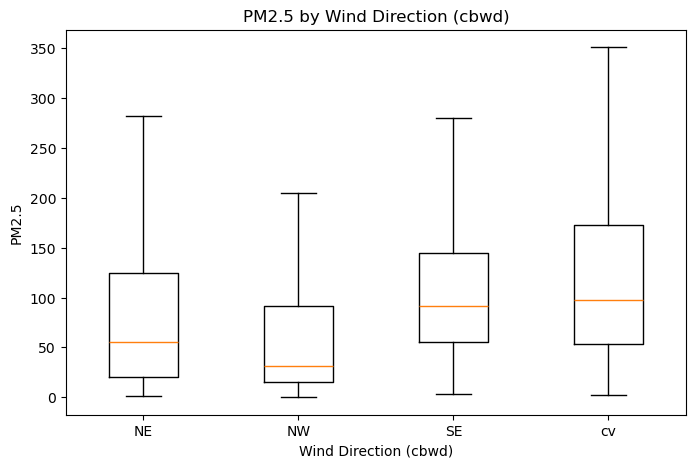

In [64]:
plt.figure(figsize=(8,5))
cats = sorted(df['cbwd'].dropna().unique())
data = [df.loc[df['cbwd']==cat, 'pm2.5'].dropna().values for cat in cats]
plt.boxplot(data, labels=cats, showfliers=False)
plt.title('PM2.5 by Wind Direction (cbwd)')
plt.xlabel('Wind Direction (cbwd)')
plt.ylabel('PM2.5')


/var/folders/8m/sdygf9451838fny1vdhdj0rh0000gn/T/ipykernel_32502/3349593315.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=False)


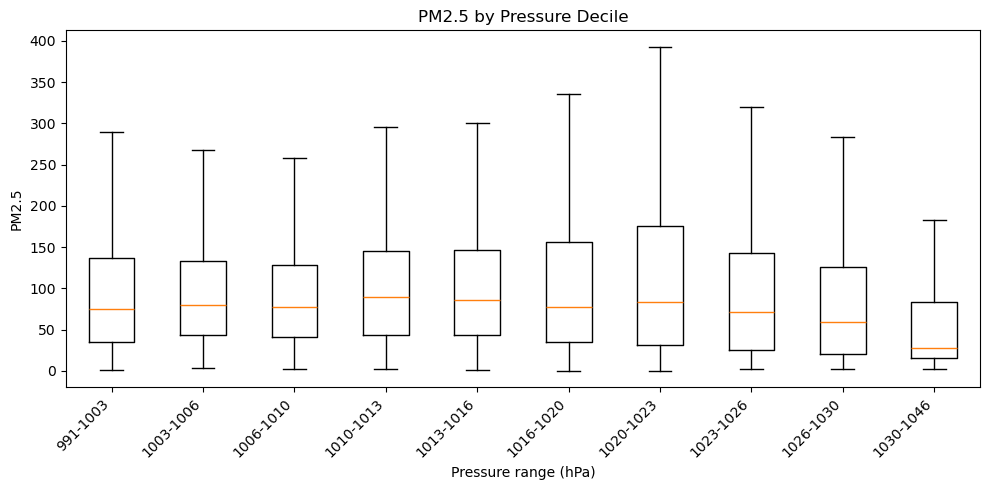

In [65]:
use = df[['PRES','pm2.5']].dropna().rename(columns={'pm2.5':'pm25'})
P, Y = use['PRES'].to_numpy(), use['pm25'].to_numpy()
deciles = np.quantile(P, np.linspace(0,1,11))
labels  = [f'{int(deciles[i])}-{int(deciles[i+1])}' for i in range(10)]
groups  = []
for i in range(10):
    lo, hi = deciles[i], deciles[i+1]
    mask = (P >= lo) & (P < hi) if i < 9 else (P >= lo) & (P <= hi)
    groups.append(Y[mask])

plt.figure(figsize=(10,5))
plt.boxplot(groups, labels=labels, showfliers=False)
plt.title('PM2.5 by Pressure Decile')
plt.xlabel('Pressure range (hPa)'); plt.ylabel('PM2.5')
plt.xticks(rotation=45, ha='right'); plt.tight_layout()


Histogram / density of target (pm2.5)

Text(0.5, 1.0, 'Feature correlation')

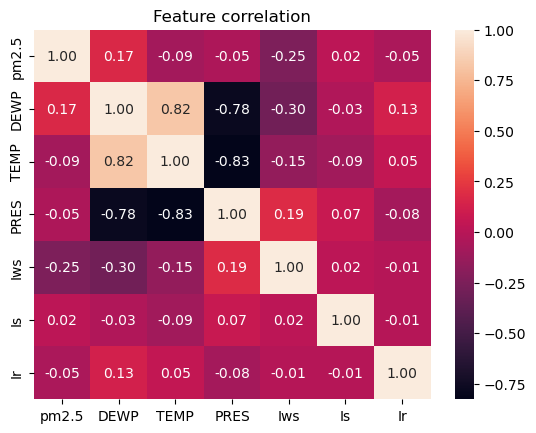

In [66]:
num = df[['pm2.5','DEWP','TEMP','PRES','Iws','Is','Ir']].copy()
sns.heatmap(num.corr(), annot=True, fmt='.2f')
plt.title('Feature correlation')

Heatmap / correlation matrix for numeric features

([<matplotlib.axis.YTick at 0x16bef1640>,
 [Text(0, 0, 'pm2.5'),
  Text(0, 1, 'DEWP'),
  Text(0, 2, 'TEMP'),
  Text(0, 3, 'PRES'),
  Text(0, 4, 'Iws'),
  Text(0, 5, 'Is'),
  Text(0, 6, 'Ir')])

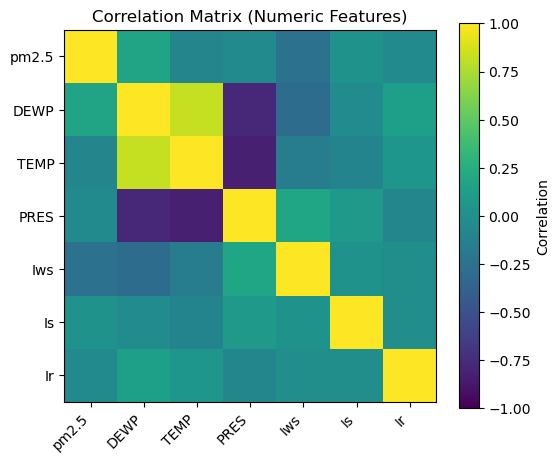

In [67]:
# 5) Correlation heatmap (numeric)
num_cols = ['pm2.5','DEWP','TEMP','PRES','Iws','Is','Ir']
corr = df[num_cols].dropna().corr()
plt.figure(figsize=(6,5)); im = plt.imshow(corr.values, origin='upper', vmin=-1, vmax=1)
plt.colorbar(im, label='Correlation'); plt.title('Correlation Matrix (Numeric Features)')
plt.xticks(range(len(num_cols)), num_cols, rotation=45, ha='right'); plt.yticks(range(len(num_cols)), num_cols)


Boxplots by month/hour to show seasonality/diurnal patterns

pandas plottig autocorrelation_plot  ///////   different features to PM2.5

# Splitting 

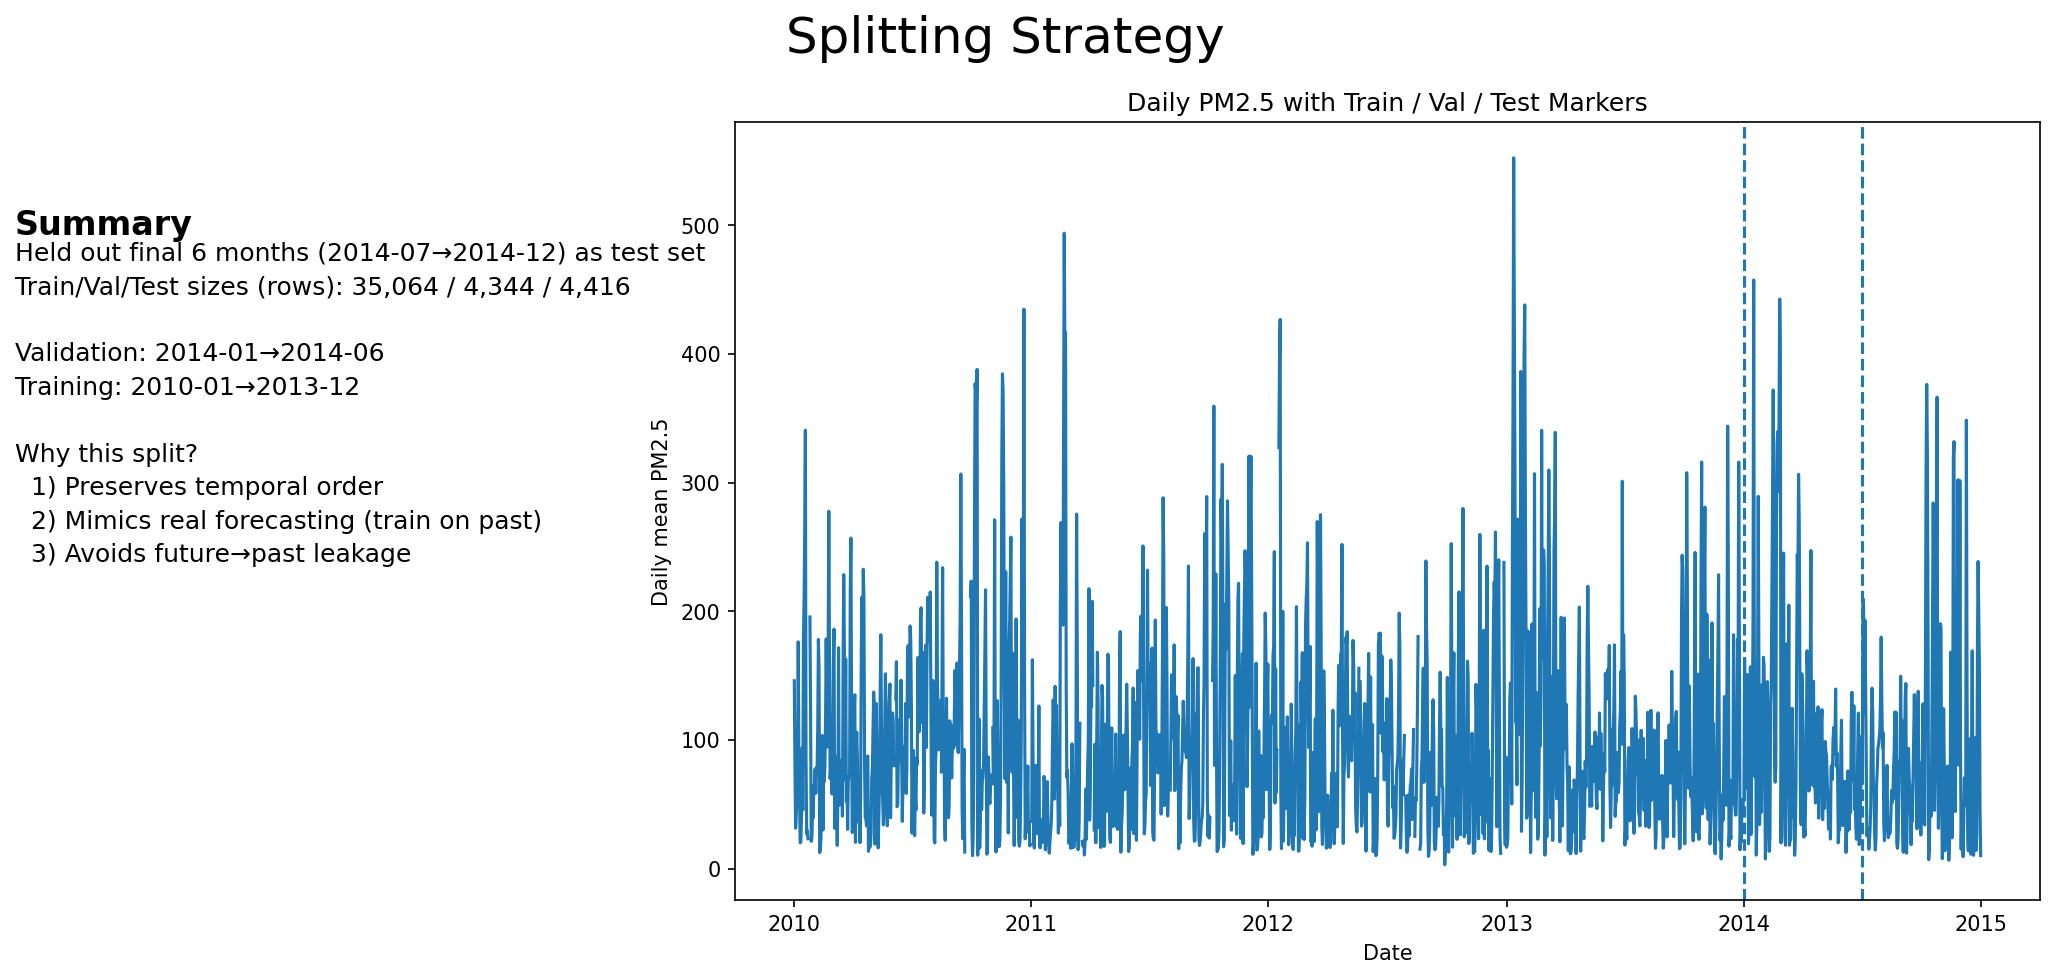

In [68]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

split_val = pd.to_datetime('2014-01-01')
split_test = pd.to_datetime('2014-07-01')

train = df[df['datetime'] < split_val]
val   = df[(df['datetime'] >= split_val) & (df['datetime'] < split_test)]
test  = df[df['datetime'] >= split_test]

daily = df.set_index('datetime')['pm2.5'].resample('D').mean()
fig = plt.figure(figsize=(15, 7.2), dpi=150) 
fig.suptitle('Splitting Strategy', fontsize=24, y=0.95)

ax = fig.add_axes([0.38, 0.13, 0.58, 0.72]) 
ax.plot(daily.index, daily.values)
ax.axvline(split_val, linestyle='--')
ax.axvline(split_test, linestyle='--')
ax.set_title('Daily PM2.5 with Train / Val / Test Markers', fontsize=12)
ax.set_xlabel('Date')
ax.set_ylabel('Daily mean PM2.5')


bullet_lines = [
    "Held out final 6 months (2014-07→2014-12) as test set",
    f"Train/Val/Test sizes (rows): {len(train):,} / {len(val):,} / {len(test):,}",
    "",
    "Validation: 2014-01→2014-06",
    "Training: 2010-01→2013-12",
    "",
    "Why this split?",
    "  1) Preserves temporal order",
    "  2) Mimics real forecasting (train on past)",
    "  3) Avoids future→past leakage"
]
text = "\n".join(bullet_lines)
fig.text(0.06, 0.77, "Summary", fontsize=16, fontweight='bold', ha='left', va='top')
fig.text(0.06, 0.74, text, fontsize=12, ha='left', va='top', linespacing=1.5)
plt.show()

In [69]:
# --- build X, y (pick your features) ---
feat_cols = ['DEWP','TEMP','PRES','Iws','Is','Ir']  # add engineered cols if you have them
target    = 'pm2.5'

df_ = df.sort_values('datetime').dropna(subset=[target]).reset_index(drop=True)
X = df_[feat_cols].to_numpy()
y = df_[target].to_numpy()

# --- time-aware split in your style (no randomness, preserves order) ---
random_state = 137  # (kept for parity with your format; unused here)

n   = len(X)
ntr = int(0.6 * n)          # 60% train
nva = int(0.2 * n)          # 20% val
nts = n - ntr - nva         # 20% test

# first split to separate out the training set (oldest 60%)
X_train, y_train = X[:ntr], y[:ntr]
X_other, y_other = X[ntr:], y[ntr:]
print('training set:', X_train.shape, y_train.shape)  # 60% in train
print('other set   :', X_other.shape, y_other.shape)  # 40% in other

# second split to separate out the validation and test sets (next 20% vs last 20%)
X_val,   y_val   = X_other[:nva], y_other[:nva]      # validation = next 20%
X_test,  y_test  = X_other[nva:], y_other[nva:]      # test       = last 20%
print('validation set:', X_val.shape, y_val.shape)   # 20% in validation
print('test set:',       X_test.shape, y_test.shape) # 20% in test

# save split dates (handy for captions)
date_train_end = df_.loc[ntr-1, 'datetime']
date_val_end   = df_.loc[ntr+nva-1, 'datetime']
print("Train end:", date_train_end, "| Val end:", date_val_end, "| Test end:", df_.iloc[-1]['datetime'])


training set: (25054, 6) (25054,)
other set   : (16703, 6) (16703,)
validation set: (8351, 6) (8351,)
test set: (8352, 6) (8352,)
Train end: 2013-01-27 15:00:00 | Val end: 2014-01-14 01:00:00 | Test end: 2014-12-31 23:00:00


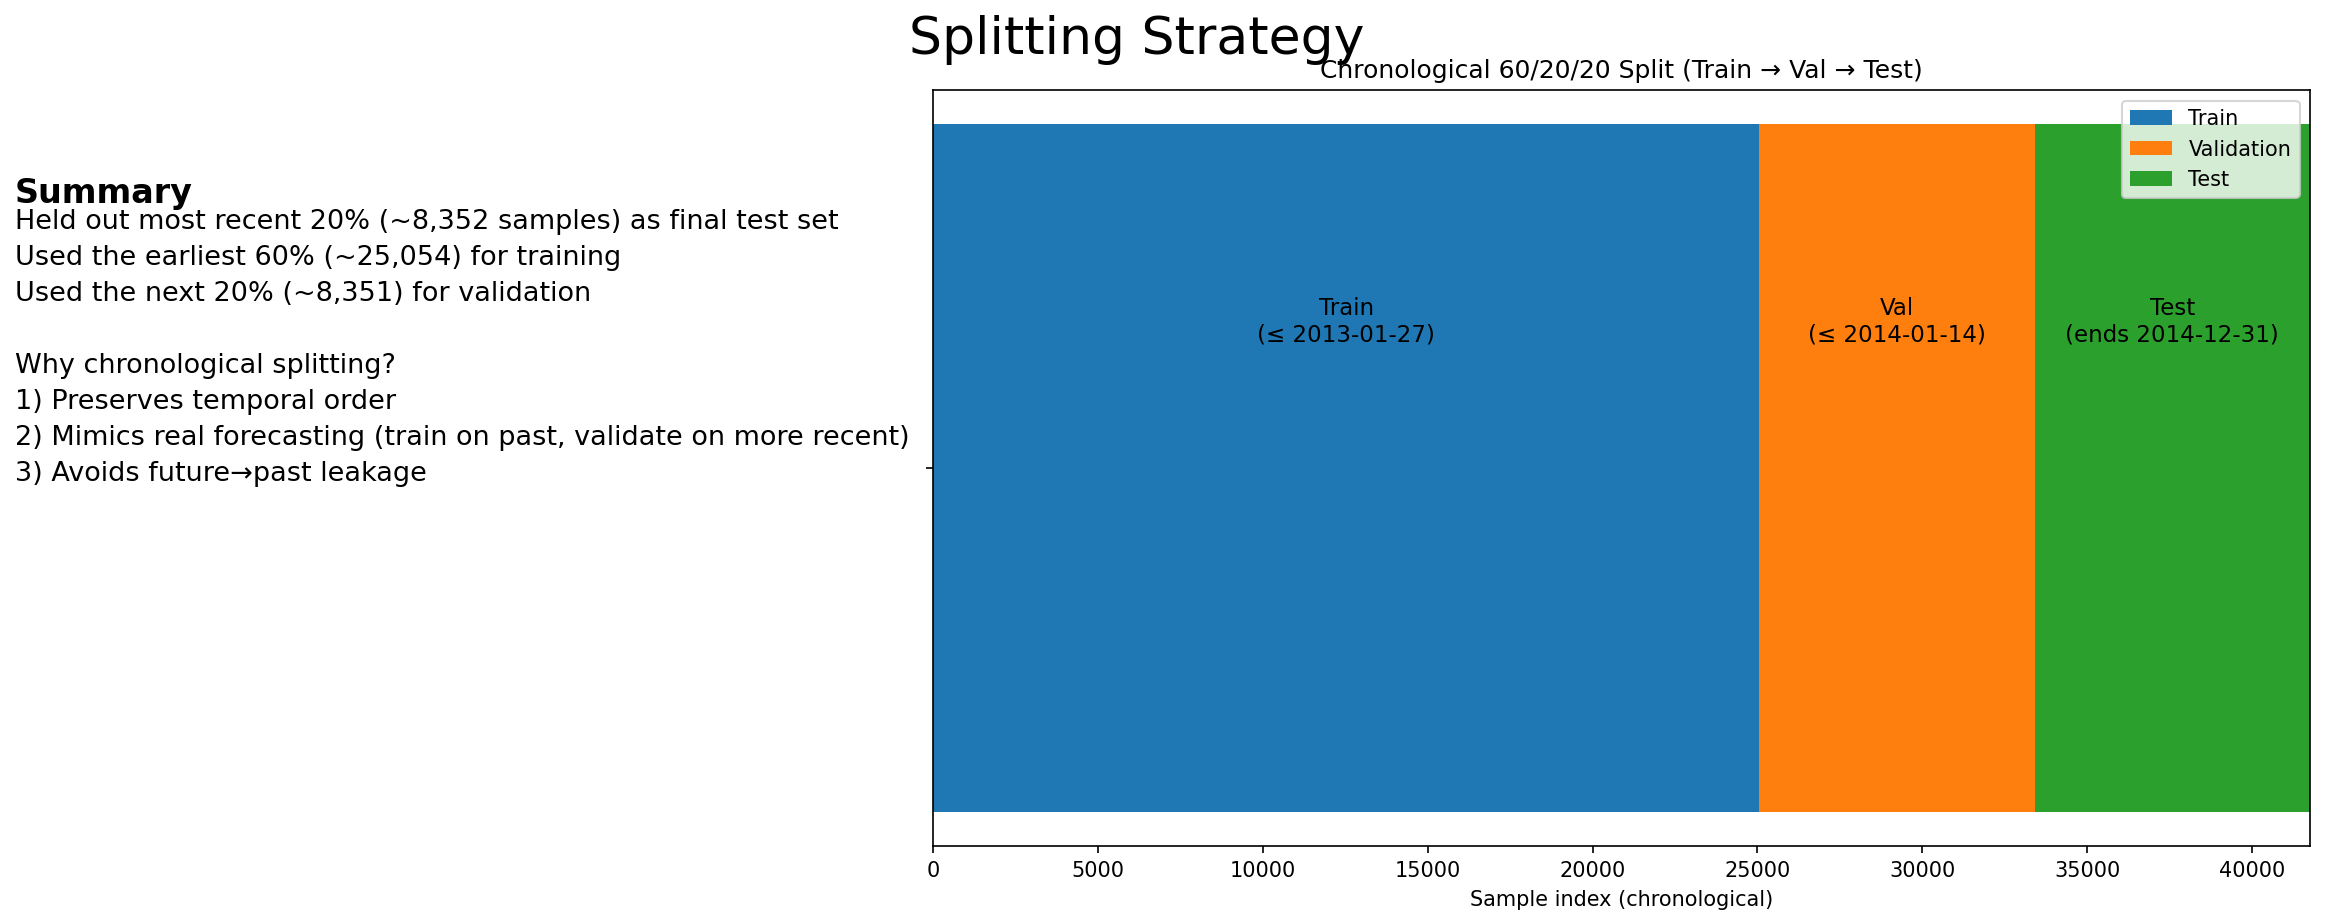

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 0) Ensure df has a datetime column and is sorted chronologically
#    (If df already exists, you can skip the next two lines.)
# df = pd.read_csv('/path/to/PRSA_data_2010.1.1-2014.12.31.csv')
# df['datetime'] = pd.to_datetime(df[['year','month','day','hour']])

df_ = df.sort_values('datetime').dropna(subset=['pm2.5']).reset_index(drop=True)

# 1) 60/20/20 chronological split (NO shuffling)
feat_cols = ['DEWP','TEMP','PRES','Iws','Is','Ir']  
n   = len(df_)
ntr = int(0.60 * n)               # oldest 60% → Train
nva = int(0.20 * n)               # next   20% → Val
nts = n - ntr - nva               # most recent 20% → Test

date_train_end = df_.loc[ntr-1,       'datetime']
date_val_end   = df_.loc[ntr+nva-1,   'datetime']
date_test_end  = df_.iloc[-1]['datetime']

# 2) Build the slide
fig = plt.figure(figsize=(17, 7.2), dpi=150)
fig.suptitle('Splitting Strategy', fontsize=25, y=0.95)

# Right: horizontal bar diagram (single axes)
ax = fig.add_axes([0.42, 0.18, 0.54, 0.70])  # left, bottom, width, height
ax.barh(1, width=ntr,        left=0,       height=0.45, label='Train')
ax.barh(1, width=nva,        left=ntr,     height=0.45, label='Validation')
ax.barh(1, width=nts,        left=ntr+nva, height=0.45, label='Test')

ax.set_yticks([1]); ax.set_yticklabels([''])
ax.set_xlim(0, n)
ax.set_xlabel('Sample index (chronological)')
ax.set_title('Chronological 60/20/20 Split (Train → Val → Test)')
ax.legend(loc='upper right')

# Annotate with end dates
ax.text(ntr/2,            1.08, f"Train\n(≤ {date_train_end.date()})", ha='center', va='bottom', fontsize=11)
ax.text(ntr + nva/2,      1.08, f"Val\n(≤ {date_val_end.date()})",    ha='center', va='bottom', fontsize=11)
ax.text(ntr + nva + nts/2,1.08, f"Test\n(ends {date_test_end.date()})",ha='center', va='bottom', fontsize=11)

# Left: summary bullets
bullets = [
    f"Held out most recent 20% (~{nts:,} samples) as final test set",
    f"Used the earliest 60% (~{ntr:,}) for training",
    f"Used the next 20% (~{nva:,}) for validation",
    "",
    "Why chronological splitting?",
    "1) Preserves temporal order",
    "2) Mimics real forecasting (train on past, validate on more recent)",
    "3) Avoids future→past leakage",
]
fig.text(0.06, 0.80, "Summary", fontsize=16, fontweight='bold', ha='left', va='top')
fig.text(0.06, 0.77, "\n".join(bullets), fontsize=13, ha='left', va='top', linespacing=1.5)

plt.show()

time series  Kfold     timeseriessplit***

# Preprocessing

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

target_col = 'pm2.5'

# Create time-based features and lag features FIRST, before splitting
df['hour'] = df['datetime'].dt.hour
df['hour_sin'] = np.sin(2*np.pi*df['hour']/24)
df['hour_cos'] = np.cos(2*np.pi*df['hour']/24)

df = df.sort_values('datetime').reset_index(drop=True)
df['pm2_1'] = df[target_col].shift(1)
df['pm2_24'] = df[target_col].shift(24)
df['pm2_24_mean'] = df[target_col].rolling(24).mean().shift(1)

# NOW split the data (after creating all features)
split_val = pd.to_datetime('2014-01-01')
split_test = pd.to_datetime('2014-07-01')

train = df[df['datetime'] < split_val]
val = df[(df['datetime'] >= split_val) & (df['datetime'] < split_test)]
test = df[df['datetime'] >= split_test]

# Analyze missingness
missing_by_col = df.isna().mean().sort_values(ascending=False)
frac_rows_with_any_missing = df.isna().any(axis=1).mean()
num_features_total = df.shape[1]
num_features_with_any_missing = int((df.isna().sum() > 0).sum())
frac_features_with_missing = num_features_with_any_missing / num_features_total

print("Fraction of rows with ANY missing:", round(frac_rows_with_any_missing, 3))
print("Features with any missing:", f"{num_features_with_any_missing}/{num_features_total}",
      f"({frac_features_with_missing:.2%})")
print("Top missing columns:\n", missing_by_col.head(10))

candidate_features = [
    'DEWP','TEMP','PRES','Iws','Is','Ir',
    'hour_sin','hour_cos','pm2_1','pm2_24','pm2_24_mean'
]

# Don't drop missing data - use imputation instead
X_train, y_train = train[candidate_features], train[target_col]
X_val, y_val = val[candidate_features], val[target_col]
X_test, y_test = test[candidate_features], test[target_col]

print(f"Before preprocessing - Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

# Create preprocessing pipeline with imputation
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),   
    ('scaler', StandardScaler())                     
])
preprocessor = ColumnTransformer([('num', num_transformer, candidate_features)])

# Fit on train, transform all sets
Xtr = preprocessor.fit_transform(X_train)
Xva = preprocessor.transform(X_val)
Xte = preprocessor.transform(X_test)

print("\nFeature count BEFORE preprocessing:", len(candidate_features))
print("Feature count AFTER preprocessing:", Xtr.shape[1])
print("Rows (train/val/test):", Xtr.shape[0], Xva.shape[0], Xte.shape[0])

# Show how many missing values were imputed
print(f"\nMissing values in training set before imputation: {X_train.isna().sum().sum()}")
print(f"Missing values in validation set before imputation: {X_val.isna().sum().sum()}")
print(f"Missing values in test set before imputation: {X_test.isna().sum().sum()}")

Fraction of rows with ANY missing: 0.142
Features with any missing: 4/19 (21.05%)
Top missing columns:
 pm2_24_mean    0.138896
pm2_24         0.047714
pm2_1          0.047189
pm2.5          0.047166
Iws            0.000000
hour_cos       0.000000
hour_sin       0.000000
datetime       0.000000
Ir             0.000000
Is             0.000000
dtype: float64
Before preprocessing - Train: (35064, 11), Val: (4344, 11), Test: (4416, 11)

Feature count BEFORE preprocessing: 11
Feature count AFTER preprocessing: 11
Rows (train/val/test): 35064 4344 4416

Missing values in training set before imputation: 9263
Missing values in validation set before imputation: 446
Missing values in test set before imputation: 537


### dont drop the missing data